In [1]:
# Helpers
import pickle
import numpy as np

# Plot
import matplotlib.pyplot as plt

### Analying distribution from SUNY dataset

In [2]:
folder = "data/suny/"
# folder = "data/ufrj/"

In [3]:
with open("%s/1_train_test.pkl" % folder, "rb") as pklfile:
# with open("%s/ufrj_dataset.pkl" % folder, "rb") as pklfile:
    data = pickle.load(pklfile)

In [4]:
data.keys()

dict_keys(['num_users', 'num_attempts', 'num_quizs', 'num_disicussions', 'train', 'test', 'cross_train', 'cross_validation'])

In [5]:
data["train"]

[[0, 9, 0.0, 0, 0],
 [0, 9, 0.0909090909091, 1, 0],
 [0, 9, 0.0909090909091, 2, 0],
 [0, 9, 0.181818181818, 3, 0],
 [0, 11, 0.0909090909091, 4, 0],
 [0, 11, 0.0, 5, 0],
 [0, 11, 0.0, 6, 0],
 [0, 11, 0.181818181818, 7, 0],
 [0, 12, 0.0, 8, 0],
 [0, 12, 0.0, 9, 0],
 [0, 12, 0.125, 10, 0],
 [0, 14, 0.1, 11, 0],
 [0, 14, 0.3, 12, 0],
 [0, 14, 0.1, 13, 0],
 [0, 14, 0.6, 14, 0],
 [0, 16, 0.111111111111, 15, 0],
 [0, 16, 0.333333333333, 16, 0],
 [0, 16, 0.555555555556, 17, 0],
 [0, 2, 0.0909090909091, 18, 0],
 [0, 2, 0.272727272727, 19, 0],
 [0, 2, 0.0, 20, 0],
 [0, 2, 0.0909090909091, 21, 0],
 [0, 2, 0.636363636364, 22, 0],
 [0, 4, 0.4, 23, 0],
 [0, 4, 0.7, 24, 0],
 [1, 11, 1.0, 0, 0],
 [1, 9, 1.0, 1, 0],
 [1, 12, 0.25, 2, 0],
 [1, 12, 0.25, 3, 0],
 [1, 14, 0.9, 4, 0],
 [1, 16, 0.888888888889, 5, 0],
 [1, 2, 0.454545454545, 6, 0],
 [1, 2, 0.636363636364, 7, 0],
 [1, 4, 1.0, 8, 0],
 [2, 11, 0.909090909091, 0, 0],
 [2, 11, 0.909090909091, 1, 0],
 [2, 9, 0.909090909091, 2, 0],
 [2, 12, 0.25, 3,

In [6]:
data["test"]

[[16, 12, 0.375, 6, 0],
 [16, 12, 0.375, 7, 0],
 [16, 12, 0.375, 8, 0],
 [16, 12, 0.375, 9, 0],
 [23, 14, 0.8, 5, 0],
 [23, 16, 0.777777777778, 6, 0],
 [23, 16, 0.888888888889, 7, 0],
 [23, 16, 1.0, 8, 0],
 [24, 11, 0.909090909091, 3, 0],
 [24, 11, 0.909090909091, 4, 0],
 [34, 9, 0.0909090909091, 2, 0],
 [38, 2, 0.272727272727, 4, 0],
 [38, 2, 0.454545454545, 5, 0],
 [50, 16, 1.0, 9, 0],
 [50, 2, 0.818181818182, 10, 0],
 [50, 2, 0.909090909091, 11, 0],
 [50, 2, 1.0, 12, 0],
 [50, 4, 0.6, 13, 0],
 [50, 4, 0.9, 14, 0],
 [50, 6, 0.6, 15, 0],
 [57, 2, 1.0, 6, 0],
 [57, 4, 0.7, 7, 0],
 [57, 4, 1.0, 8, 0],
 [57, 3, 0.978505651478, 9, 0],
 [62, 16, 0.888888888889, 9, 0],
 [62, 2, 0.454545454545, 10, 0],
 [62, 2, 0.636363636364, 11, 0],
 [62, 2, 0.636363636364, 12, 0],
 [62, 4, 1.0, 13, 0],
 [62, 6, 0.7, 14, 0],
 [62, 3, 0.984646893913, 15, 0],
 [71, 14, 1.0, 12, 0],
 [71, 16, 0.666666666667, 13, 0],
 [71, 16, 1.0, 14, 0],
 [71, 2, 0.454545454545, 15, 0],
 [71, 2, 0.545454545455, 16, 0],
 [71,

In [7]:
total = 0
for i, fold in enumerate(data["cross_train"]):
    total += len(fold)
    print("Fold %d has %d items" % (i, len(fold)))

Fold 0 has 5715 items
Fold 1 has 5625 items
Fold 2 has 5661 items
Fold 3 has 5682 items


In [8]:
total = 0
cross_train_items = []
repeated_cross_train_items = []
for i, fold in enumerate(data["cross_train"]):
    for row in fold:
        # Check if row is not in train or if it was repeated
        if row not in data["train"] and row not in data["test"]:
            if row not in cross_train_items:
                cross_train_items.append(row)
            else:
                repeated_cross_train_items.append(row)

In [9]:
total = 0
cross_test_items = []
repeated_cross_test_items = []
for i, fold in enumerate(data["cross_validation"]):
    for row in fold:
        # Check if row is not in train or if it was repeated
        if row not in data["train"] and row not in data["test"]:
            if row not in cross_test_items:
                cross_test_items.append(row)
            else:
                repeated_cross_test_items.append(row)

In [10]:
total = 0
for i, fold in enumerate(data["cross_validation"]):
    total += len(fold)
    print("Fold %d has %d items" % (i, len(fold)))

Fold 0 has 527 items
Fold 1 has 617 items
Fold 2 has 581 items
Fold 3 has 560 items


In [11]:
students_train_list = [item[0] for item in data["train"]]
students_train_set = set(students_train_list)

print("Total of %d items in train belonging to %d different students" % (len(students_train_list), 
                                                                         len(students_train_set)))

Total of 4682 items in train belonging to 458 different students


In [12]:
students_test_list = [item[0] for item in data["test"]]
students_test_set = set(students_test_list)

print("Total of %d items in train belonging to %d different students" % (len(students_test_list), 
                                                                         len(students_test_set)))

Total of 439 items in train belonging to 71 different students


In [13]:
common_students = students_train_set & students_test_set
len(common_students)

71

In [14]:
only_train = students_train_set - students_test_set

In [15]:
# Number of attempts from test students in train set
attempts_train = []
attempts_test = []
for student in students_test_set:
    attempts_train.append(students_train_list.count(student))
    attempts_test.append(students_test_list.count(student))
    
# Number of attempts from train students in train set
attempts_all_train = []
for student in students_train_set:
    attempts_all_train.append(students_train_list.count(student))
    
# Number of attempts from train students in train set that are not in test set
attempts_only_train = []
for student in only_train:
    attempts_only_train.append(students_train_list.count(student))

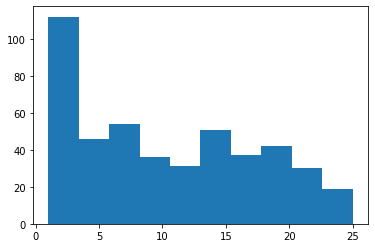

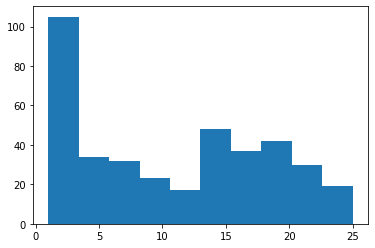

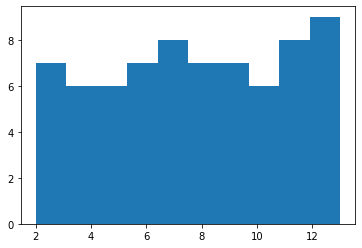

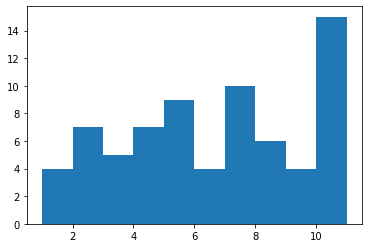

In [16]:
plt.hist(attempts_all_train)
plt.show()

plt.hist(attempts_only_train)
plt.show()

plt.hist(attempts_train)
plt.show()

plt.hist(attempts_test)
plt.show()

### Retrieving my data

In [2]:
from django.db.models import Case, IntegerField, Value

In [3]:
problems = Problem.objects.exclude(chapter=None)

In [4]:
attempts = UserLog.objects.exclude(outcome='S').filter(
    timestamp__lt=OuterRef('timestamp'), user__id=OuterRef('user__id')).annotate(
    attempt=Count('*')).values('attempt')

# Remove group by values
attempts.query.set_group_by()

In [5]:
# Get users (students who have started this semester with lab exercises)
users = UserLog.objects.filter(problem__in=problems).exclude(outcome='S').annotate(
    attempt=Subquery(attempts, output_field=IntegerField())).annotate(
    score=Case(
        When(outcome='F', then=Value(0)),
        When(outcome='P', then=Value(1)),
        output_field=IntegerField())).values_list(
    "user__id", "problem", "attempt", "score"#"outcome", "timestamp"
).order_by("timestamp").filter(attempt=1).values_list('user_id', flat=True)

In [6]:
solutions = UserLog.objects.filter(problem__in=problems).exclude(outcome='S').annotate(
    attempt=Subquery(attempts, output_field=IntegerField())).annotate(
    score=Case(
        When(outcome='F', then=Value(0)),
        When(outcome='P', then=Value(1)),
        output_field=IntegerField())).annotate(resource=Value(0,  IntegerField())).values_list(
    "user__id", "problem", "attempt", "score", "resource"#"outcome", "timestamp"
                                                                    ).order_by("timestamp").filter(user__in=users)

In [7]:
%%time
attempt_stats = solutions.aggregate(min_attempt=Min('attempt'), 
                                    max_attempt=Max('attempt'), avg_attempt=Avg('attempt'))
attempts_list = solutions.values_list("attempt", flat=True)
attempt_stats['median_attempt'] = np.median(attempts_list)
attempt_stats

CPU times: user 92.6 ms, sys: 454 µs, total: 93.1 ms
Wall time: 20.6 s


{'min_attempt': 0,
 'max_attempt': 935,
 'avg_attempt': 155.26696897718276,
 'median_attempt': 101.0}

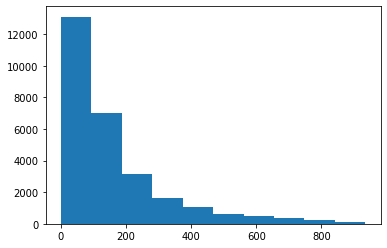

In [8]:
plt.hist(attempts_list)
plt.show()

### Keeping attempt to 150

In [9]:
solutions.count()

27786

In [10]:
data = solutions.filter(attempt__lt=50)
data.count()

7899

In [11]:
%%time
attempt_stats = data.aggregate(min_attempt=Min('attempt'), 
                                    max_attempt=Max('attempt'), avg_attempt=Avg('attempt'))
attempts_list = data.values_list("attempt", flat=True)
attempt_stats['median_attempt'] = np.median(attempts_list)
attempt_stats

CPU times: user 33 ms, sys: 0 ns, total: 33 ms
Wall time: 15.5 s


{'min_attempt': 0,
 'max_attempt': 49,
 'avg_attempt': 23.01076085580453,
 'median_attempt': 22.0}

### Splitting in train and test

In [12]:
np.random.seed(1)
users = list(users)
np.random.shuffle(users)

In [13]:
TRAIN_PROPORTION = 0.8
idx = int(np.ceil(TRAIN_PROPORTION*len(users)))
train_users = users[:idx]
test_users = users[idx:]

These users will uniquely be used for train

In [14]:
%%time
train_set = list(data.filter(user_id__in=train_users))
len(train_set)

CPU times: user 31.1 ms, sys: 0 ns, total: 31.1 ms
Wall time: 6.6 s


6247

Some users will be used in training up to a certain number of attempts

In [15]:
%%time
test_set = []
np.random.seed(1)
train_attempts = np.random.uniform(size=len(test_users))
for idx, user in enumerate(test_users):
    user_attempts = data.filter(user_id=user)
    ta = int(np.ceil(train_attempts[idx]*user_attempts.count()))
    train_set.extend(list(user_attempts.filter(attempt__lte=ta).order_by('attempt')))
    test_set.extend(list(user_attempts.filter(attempt__gt=ta).order_by('attempt')))

CPU times: user 662 ms, sys: 0 ns, total: 662 ms
Wall time: 7.53 s


Mapping users and questions to be in 0-len index

In [17]:
questions = list(set(list(data.values_list("problem", flat=True))))
len(questions)

65

In [18]:
def get_user_idx(user_id):
    return users.index(user_id)

map_user_id = np.vectorize(get_user_idx)

def get_question_idx(question_id):
    return questions.index(question_id)
    
map_question_id = np.vectorize(get_question_idx)

In [19]:
train_set = np.asarray(train_set)
user_idx_train = map_user_id(train_set[:,0])
train_set[:,0] = user_idx_train

In [20]:
test_set = np.asarray(test_set)
user_idx_test = map_user_id(test_set[:,0])
test_set[:,0] = user_idx_test

In [21]:
question_idx_train = map_question_id(train_set[:,1])
train_set[:,1] = question_idx_train
question_idx_test = map_question_id(test_set[:,1])
test_set[:,1] = question_idx_test

In [22]:
len(train_set)

7062

In [23]:
len(test_set)

837

In [24]:
train_set[:,2].min()

0

In [25]:
ufrj_dataset = {}
ufrj_dataset["num_users"] = len(users)
ufrj_dataset["num_attempts"] = attempt_stats["max_attempt"]+1
ufrj_dataset["num_quizs"] = problems.count()
ufrj_dataset["num_discussions"] = 1
ufrj_dataset["train"] = train_set
ufrj_dataset["test"] = test_set
ufrj_dataset["user_id_map"] = users
ufrj_dataset["question_id_map"] = questions

In [26]:
with open("data/ufrj/ufrj_dataset_2020_02_17.pkl", "wb") as pklfile:
    pickle.dump(ufrj_dataset, pklfile)